In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pyplot as plt

## Lectura de datos

In [14]:
data = datasets.load_breast_cancer() #toy datasets
X = data.data 
y = data.target

## Análsis descriptivo

In [15]:
df_X = pd.DataFrame(X)
df_X.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Hay que tener en cuenta las transformaciones que requiere el data set por calidad de datos,  por el objetivo del demo no fueron incluidas aca

## Modelo predictivo

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1) # Separar datos de entrenamiento y de prueba

In [17]:
clf = RandomForestClassifier(max_depth = 2, random_state=1) #creo el modelo
clf.fit(X_train, y_train) #entreno el modelo

RandomForestClassifier(max_depth=2, random_state=1)

## Evaluar el modelo

In [18]:
y_pred_test = clf.predict(X_test) # generar predicciones con el dataset de test
y_pred_train = clf.predict(X_train) # generar predicciones con el dataset de train

print(np.mean(y_pred_test ==y_test)) #porncetaje de veces que acertó en la base de datos de prueba
print(np.mean(y_pred_train == y_train)) # porcentaje de veces que acertó en la base de datos de entrenamiento

0.9239766081871345
0.9723618090452262


## Mejorar el modelo (Encontrar los mejores hiperparametros)

RandomForestClassifier(max_depth=1, random_state=1)

RandomForestClassifier(max_depth=2, random_state=1)

RandomForestClassifier(max_depth=3, random_state=1)

RandomForestClassifier(max_depth=4, random_state=1)

RandomForestClassifier(max_depth=5, random_state=1)

RandomForestClassifier(max_depth=10, random_state=1)

RandomForestClassifier(max_depth=20, random_state=1)

RandomForestClassifier(max_depth=30, random_state=1)

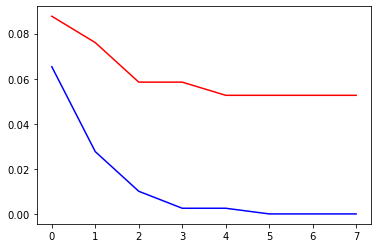

In [23]:
max_depths = [1,2,3,4,5,10,20,30]
train_error = []
test_error = []

for max_depth  in max_depths :
    clf = RandomForestClassifier(max_depth=max_depth, random_state=1) #creo el modelo
    clf.fit(X_train, y_train) #entreno el modelo
    train_error.append(np.mean(clf.predict(X_train)!=y_train)) #lista con errores de entrnamiento para los diferentes hiperparametros
    test_error.append(np.mean(clf.predict(X_test)!=y_test)) #lista con errores de prueba para los diferentes hiperparametros
    
plt.plot(train_error, color="b")
plt.plot(test_error, color="r")
#plt.plot(np.array(test_error)-np.array(train_error), color="g")